# Optimizers Assignment

In [ ]:
# Ans 1: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. How you should change your weights or learning rates of your neural network to reduce the losses is defined by the optimizers you use
# Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible

In [ ]:
# Ans 2: Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.
# Adam tends to converge faster, while SGD often converges to more optimal solutions. SGD's high variance disadvantages gets rectified by Adam (as advantage for Adam). Adam tends to converge faster, while SGD often converges to more optimal solutions

In [ ]:
# Ans 3: The problem with gradient descent is that the weight update at a moment (t) is governed by the learning rate and gradient at that moment only. It doesn't take into account the past steps taken while traversing the cost space
# The slow convergence problem refers to the time it takes for a routing protocol to converge, or to reach a stable state in which all routers in the network have the same view of the network topology and can accurately route packets to their destinations
# Local minimum is the point in the domain of the functions, which has the minimum value. The local minimum can be computed by finding the derivative of the function. The first derivative test, and the second derivative test, are the two important methods of finding the local minimum for a function
# Both the location and the level or value of the minimum are wrong and give erroneous results. One way of attempting to overcome this is to run your algorithm multiple times, with a different starting point each time. This increases the chance that it will find the global rather than getting stuck in a local.

In [ ]:
# Ans 4: Momentum is a gradient descent optimization approach that adds a percentage of the prior update vector to the current update vector to speed up the learning process.
# Momentum can accelerate training and learning rate schedules can help to converge the optimization process. Adaptive learning rates can accelerate training and alleviate some of the pressure of choosing a learning rate and learning rate schedule

In [ ]:
# Ans 5 : Compared to Gradient Descent, Stochastic Gradient Descent is much faster, and more suitable to large-scale datasets. But since the gradient it's not computed for the entire dataset, and only for one random point on each iteration, the updates have a higher variance.
* Can veer off in the wrong direction due to frequent updates
* Lose the benefits of vectorization since we process one observation per time
* Frequent updates are computationally expensive due to using all resources for processing one training sample at a time

In [ ]:
# Ans 6 : The name is derived from adaptive moment estimation. The optimizer is called Adam because uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network
# Benifits : Overall, the Adam optimizer is a powerful tool for improving the accuracy and speed of deep learning models. Its adaptive learning rate and momentum-based approach can help the neural network learn faster and converge more quickly towards the optimal set of parameters that minimize the cost or loss function.
# Disadvantages: Adam does not converge to an optimal solution in some areas (this is the motivation for AMSGrad). Adam can suffer a weight decay problem (which is addressed in AdamW). Recent optimization algorithms have been proven faster and better

In [ ]:
# Ans 7:The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster.
# Furthermore, each dimension of the gradient is rescaled similar to RMSprop. One key difference between Adam and RMSprop (or AdaGrad) is the fact that the moment estimates m and v are corrected for their bias towards zero. Adam is well-known for achieving good performance with little hyper-parameter tuning.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import keras 
from keras import optimizers
import tensorflow as tf

2023-06-19 09:42:10.309941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 09:42:10.824723: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 09:42:10.826289: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 09:42:12.525918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [7]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [67]:
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

# scale the test set as well 
X_test=X_test/255

In [68]:
len(X_train_full[5000:])

55000

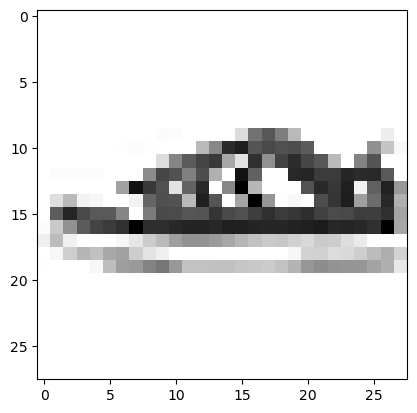

In [16]:
plt.imshow(X_train[500],cmap='binary')
plt.show()

<AxesSubplot: >

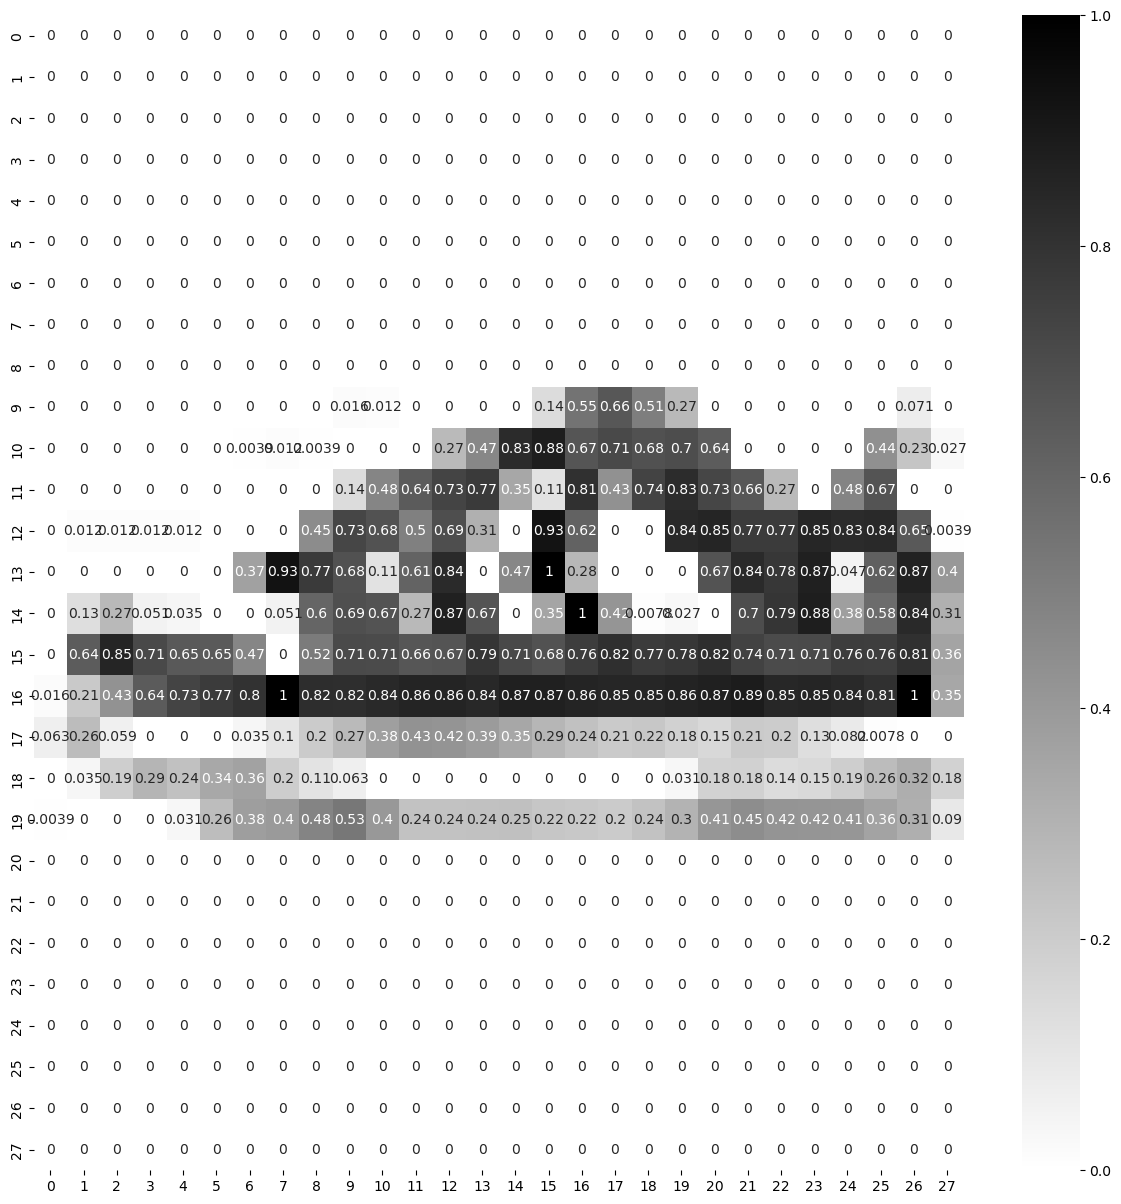

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[500],annot=True,cmap='binary')

In [18]:
28*28

784

In [69]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='tanh',name='hiddenlayer1',kernel_initializer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2',kernel_initializer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(50,activation='relu',name='hiddenlayer3',kernel_initializer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10,activation='softmax',name='Hiddenlayer')
]

model_clf=tf.keras.models.Sequential(LAYERS)

In [70]:
model_clf.layers

In [71]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 dropout_17 (Dropout)        (None, 300)               0         
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 hiddenlayer3 (Dense)        (None, 50)                5050      
                                                                 
 dropout_19 (Dropout)        (None, 50)               

In [72]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [73]:
hidden1.get_weights()[0].shape

(784, 300)

In [74]:
hidden1.get_weights()[1].shape

(300,)

In [75]:
weights,biases=hidden1.get_weights()

In [76]:
weights.shape,biases.shape

((784, 300), (300,))

In [77]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [78]:
weights

array([[ 0.02770103, -0.00528722,  0.00322173, ..., -0.00055733,
         0.02039343, -0.03582025],
       [-0.02410421, -0.00981307, -0.05377723, ..., -0.04825664,
        -0.001114  ,  0.06386105],
       [-0.02665822,  0.02366941,  0.05686426, ..., -0.0095661 ,
         0.02634475,  0.02961808],
       ...,
       [ 0.00192228,  0.03746046, -0.04062893, ..., -0.05100212,
        -0.04100721,  0.02291717],
       [ 0.02121547, -0.03871617, -0.00675474, ..., -0.01928031,
         0.02786171,  0.09548442],
       [ 0.02644497,  0.01439008,  0.00280588, ...,  0.00391173,
         0.01491801, -0.09646501]], dtype=float32)

In [79]:
# Ans 8 Implementation of SGD 

LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
#OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
SGD=tf.keras.optimizers.SGD(
    learning_rate=0.05,
    momentum=0.3)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=SGD,
                  metrics=METRICS
                 )

In [80]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5935 - accuracy: 0.7839 - val_loss: 0.4094 - val_accuracy: 0.8510
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4448 - accuracy: 0.8366 - val_loss: 0.3766 - val_accuracy: 0.8640
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4033 - accuracy: 0.8525 - val_loss: 0.3680 - val_accuracy: 0.8670
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.8607 - val_loss: 0.3425 - val_accuracy: 0.8760
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3655 - accuracy: 0.8667 - val_loss: 0.3370 - val_accuracy: 0.8748


In [82]:
# Adam Optimiser 
LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
#OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
Adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.1,
    beta_2=0.6)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=SGD,
                  metrics=METRICS
                 )

In [83]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3527 - accuracy: 0.8694 - val_loss: 0.3282 - val_accuracy: 0.8826
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3387 - accuracy: 0.8757 - val_loss: 0.3170 - val_accuracy: 0.8854
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3308 - accuracy: 0.8766 - val_loss: 0.3358 - val_accuracy: 0.8758
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3211 - accuracy: 0.8821 - val_loss: 0.3389 - val_accuracy: 0.8766
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8840 - val_loss: 0.3130 - val_accuracy: 0.8860


In [84]:
# RMS Prop Optimizer 
LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
#OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
Adam=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.3,
    momentum=0.76)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=SGD,
                  metrics=METRICS
                 )

In [85]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.8839 - val_loss: 0.3070 - val_accuracy: 0.8904
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3020 - accuracy: 0.8870 - val_loss: 0.3039 - val_accuracy: 0.8866
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2980 - accuracy: 0.8880 - val_loss: 0.2930 - val_accuracy: 0.8914
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2897 - accuracy: 0.8929 - val_loss: 0.3053 - val_accuracy: 0.8876
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2845 - accuracy: 0.8934 - val_loss: 0.3099 - val_accuracy: 0.8838


In [86]:
# Ans 9: As per the test and optimizer it seems RMSprop performed the best and have provdied the results of 89 per . 
# however as for avoiding the concept of overfitting we will use the Adam resilts of 88 per which is also silghtly closer to overfit yet its the best optimiser and combination of momentum and rmse .

<AxesSubplot: >

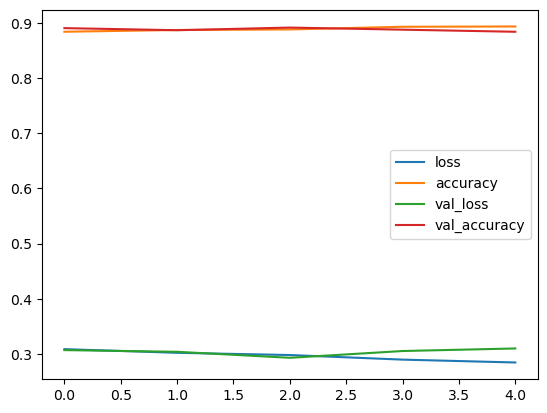

In [87]:
pd.DataFrame(history.history).plot()

In [88]:
model_clf.evaluate(X_test,y_test)
# worst results of the model as its is overfitted over the train data and will consider noise while prediction the model 

313/313 [==============================] - 1s 2ms/step - loss: 8.0645 - accuracy: 0.1000


[8.064546585083008, 0.10000000149011612]

In [89]:
x_new=X_test[:200]
x_new

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [90]:
actual=y_test[:200]
actual

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4,
       2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1,
       9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 4, 1, 4,
       5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1,
       3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3,
       6, 1], dtype=uint8)

<AxesSubplot: >

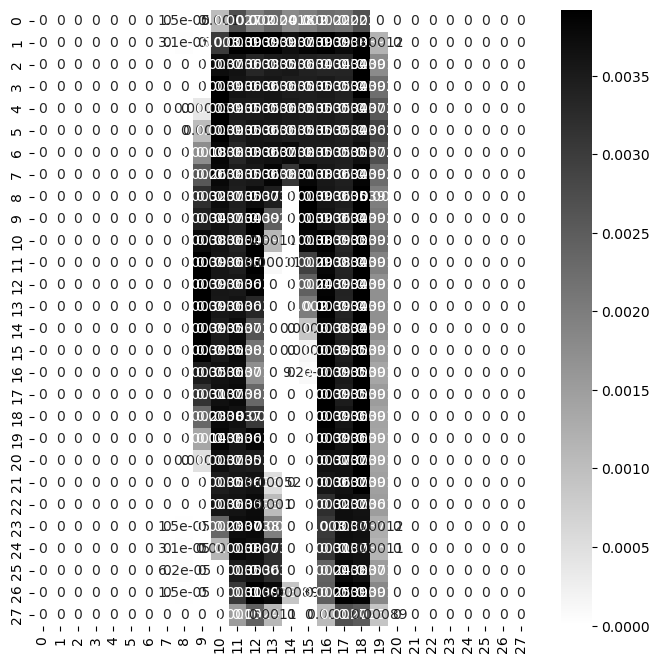

In [91]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap='binary')

In [92]:
y_prob=model_clf.predict(x_new)
y_prob.round(2)

7/7 [==============================] - 0s 2ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
y_prob

array([[7.92996841e-04, 6.72593796e-06, 5.93094810e-05, ...,
        4.23835474e-04, 2.92103068e-04, 1.28069705e-05],
       [1.56209490e-03, 9.82577785e-06, 1.22527941e-04, ...,
        4.51883418e-04, 4.46982507e-04, 1.52664597e-05],
       [1.33410224e-03, 1.22503052e-05, 9.28536319e-05, ...,
        4.60821291e-04, 3.98651115e-04, 1.68609640e-05],
       ...,
       [1.27909391e-03, 1.05210829e-05, 9.41089893e-05, ...,
        4.77723690e-04, 4.07079060e-04, 1.60013278e-05],
       [1.09902816e-03, 8.29113742e-06, 7.90823469e-05, ...,
        3.94850445e-04, 3.40060040e-04, 1.31817987e-05],
       [1.34586461e-03, 1.29452501e-05, 9.41908802e-05, ...,
        4.80050338e-04, 4.00219025e-04, 1.76761805e-05]], dtype=float32)

In [94]:
y_pred=np.argmax(y_prob,axis=1)

In [95]:
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5])

# lets try the same test with another dataset 
# Dataset 2 

In [3]:

cifar=tf.keras.datasets.cifar100

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=cifar.load_data()

In [5]:
X_train_full[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [6]:
print(X_train_full.shape)
print(X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
print(y_train_full.shape)
print('\n=========\n')
print(np.unique(y_train_full))

(50000, 1)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train_full[0].shape

(32, 32, 3)

In [11]:
x_valid,X_train=X_train_full[:7000]/255,X_train_full[7000:]/255
y_valid,y_train=y_train_full[:7000],y_train_full[7000:]

# scale the test set as well 
X_test=X_test/255

In [12]:
len(X_train_full[7000:])

43000

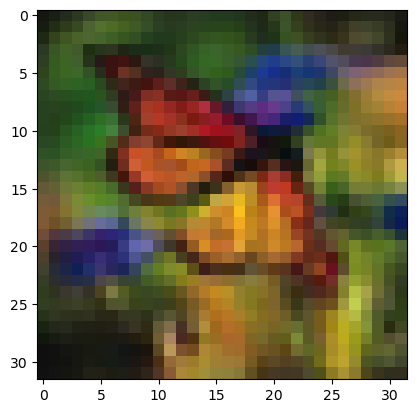

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

In [20]:
32*32*3

3072

In [15]:
from keras import regularizers
from keras import initializers

In [16]:
LAYERS=[tf.keras.layers.Flatten(input_shape=(32,32,3),name='inputLayer'),
        tf.keras.layers.Dense(25,activation='relu',name='hiddenLayer1',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(25,activation='relu',name='hiddenLayers2',kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='softmax',name='outputLayer')
       ]
model_clf=tf.keras.models.Sequential(LAYERS)

In [17]:
model_clf.layers

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 25)                76825     
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 hiddenLayers2 (Dense)       (None, 25)                650       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 outputLayer (Dense)         (None, 100)               2600      
                                                                 
Total params: 80,075
Trainable params: 80,075
Non-traina

In [19]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
hidden1.get_weights()[2].shape

IndexError: list index out of range

In [21]:
LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
#OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
SGD=tf.keras.optimizers.SGD(
    learning_rate=0.25,
    momentum=0.4)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=SGD,
                  metrics=METRICS
                 )

In [ ]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1344/1344 [==============================] - 5s 3ms/step - loss: 4.6277 - accuracy: 0.0091 - val_loss: 4.6248 - val_accuracy: 0.0069
Epoch 2/5
1344/1344 [==============================] - 4s 3ms/step - loss: 4.6204 - accuracy: 0.0089 - val_loss: 4.6161 - val_accuracy: 0.0096
Epoch 3/5
1344/1344 [==============================] - 4s 3ms/step - loss: 4.6154 - accuracy: 0.0098 - val_loss: 4.6138 - val_accuracy: 0.0073
Epoch 4/5
1344/1344 [==============================] - 4s 3ms/step - loss: 4.6121 - accuracy: 0.0095 - val_loss: 4.6118 - val_accuracy: 0.0100
Epoch 5/5
1022/1344 [=====================>........] - ETA: 0s - loss: 4.6104 - accuracy: 0.0090

In [24]:
LAYERS=[tf.keras.layers.Flatten(input_shape=(32,32,3),name='inputLayer'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4)),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(150,activation='relu',name='hiddenLayers2',kernel_initializer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='softmax',name='outputLayer')
       ]
model_clf_2=tf.keras.models.Sequential(LAYERS)

In [25]:
model_clf_2.layers

In [26]:
model_clf_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 3072)              0         
                                                                 
 dropout_9 (Dropout)         (None, 3072)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               921900    
                                                                 
 dropout_10 (Dropout)        (None, 300)               0         
                                                                 
 hiddenLayers2 (Dense)       (None, 150)               45150     
                                                                 
 dropout_11 (Dropout)        (None, 150)               0         
                                                                 
 outputLayer (Dense)         (None, 100)              

In [27]:
hidden1=model_clf_2.layers[1]
hidden1.name

'dropout_9'

In [33]:
# Adam Optimizer for lager NN datset as previous performed bad 

LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
#OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
Adam=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.2,
    beta_2=0.76)
METRICS=['accuracy']

model_clf_2.compile(loss=LOSS_FUNCTION,
                  optimizer=Adam,
                  metrics=METRICS
                 )

In [ ]:
EPOCHS=5
VALIDATION_SET=(x_valid,y_valid)

history=model_clf_2.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1375/1375 [==============================] - 14s 9ms/step - loss: 4.6084 - accuracy: 0.0255 - val_loss: 4.4162 - val_accuracy: 0.0375
Epoch 2/5
1347/1375 [============================>.] - ETA: 4s - loss: 4.5498 - accuracy: 0.0320